In [ ]:

from matplotlib import pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms, models
from PIL import Image
import numpy as np
import os
from torch.utils.data.sampler import SubsetRandomSampler
import pandas as pd




device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
#pretrained=True will download a pretrained network for us



#Freezing model parameters and defining the fully connected network to be attached to the model, loss function and the optimizer.



# for param in model1.parameters():
#     param.requires_grad = False
# for param in model2.parameters():
#     param.requires_grad = False





# c=0
# for param in model.parameters():
#   if (param.requires_grad):
#     c+=1  
# print(c)

# criterion = nn.CrossEntropyLoss()


# optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.003,)
# model.to(device)




True


In [ ]:
# model = models.alexnet(pretrained=True)
# model

# for param in model.parameters():
#     param.requires_grad = True


In [ ]:
# fc = nn.Sequential(
#     nn.Linear(9216, 4096),
#     nn.ReLU(),
#     nn.Dropout(0.4),
#     nn.Linear(4096,5),
    
# )
# model.classifier = fc

In [ ]:
model = models.resnet18(pretrained=True)
model

for param in model.parameters():
    param.requires_grad = True

In [ ]:
fc = nn.Sequential(
    nn.Linear(512, 320),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(320,5)
)
model.fc = fc

In [ ]:
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.0001,)
model
model_save_name1 = "resnet_5class.pth"


In [ ]:
# Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
                                      transforms.RandomRotation(degrees=15),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.CenterCrop(size=224),  # Image net standards
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])
                                      ])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(224),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], 
                                                                 [0.229, 0.224, 0.225])])
train_dir='/content/drive/My Drive/dataset8/train'
test_dir='/content/drive/My Drive/dataset8/test'
batch_size=16
#Loading in the dataset

train_data = datasets.ImageFolder(train_dir,transform=train_transforms)
test_data = datasets.ImageFolder(test_dir,transform=test_transforms)

print(train_data.class_to_idx)
# number of subprocesses to use for data loading
num_workers = 0
# percentage of training set to use as validation
valid_size = 0.2

test_size = 0.0

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
test_indices=list(range(len(test_data)))
# print(indices)
np.random.shuffle(indices)
# print(indices)
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]
print(len(valid_idx), len(test_indices), len(train_idx))

# train_idx= [328, 125, 429, 789, 305, 773, 580, 787, 170, 86, 639, 837, 553, 856, 732, 192, 103, 204, 659, 157, 778, 551, 761, 524, 205, 309, 48, 567, 702, 293, 533, 198, 131, 544, 464, 166, 785, 803, 113, 835, 780, 729, 797, 80, 655, 676, 566, 462, 169, 211, 449, 348, 738, 848, 535, 623, 494, 814, 790, 41, 838, 606, 486, 519, 827, 460, 723, 647, 667, 463, 446, 187, 608, 719, 311, 152, 578, 531, 443, 695, 767, 425, 569, 441, 691, 678, 800, 721, 282, 323, 706, 391, 330, 213, 561, 257, 3, 456, 665, 868, 532, 407, 350, 31, 251, 371, 189, 740, 461, 585, 396, 866, 308, 850, 862, 668, 93, 165, 488, 160, 320, 607, 417, 235, 314, 366, 836, 164, 627, 351, 852, 841, 354, 818, 594, 252, 118, 859, 53, 17, 798, 440, 209, 231, 404, 699, 66, 847, 179, 515, 753, 822, 241, 514, 629, 133, 562, 660, 801, 742, 230, 398, 362, 298, 194, 755, 733, 278, 421, 650, 586, 413, 831, 579, 556, 316, 709, 42, 222, 206, 447, 536, 741, 574, 52, 468, 474, 700, 769, 872, 200, 869, 402, 4, 786, 851, 258, 201, 11, 573, 839, 557, 24, 269, 642, 303, 199, 182, 518, 791, 508, 480, 95, 746, 656, 89, 126, 319, 409, 161, 559, 146, 246, 530, 467, 156, 871, 295, 582, 106, 344, 679, 121, 360, 207, 622, 715, 281, 324, 403, 26, 534, 457, 444, 130, 405, 490, 527, 365, 459, 497, 758, 683, 8, 718, 274, 772, 181, 339, 292, 430, 347, 50, 528, 618, 673, 380, 855, 630, 342, 570, 345, 750, 603, 598, 560, 223, 604, 771, 184, 82, 710, 543, 406, 326, 619, 147, 220, 420, 437, 123, 180, 765, 806, 688, 505, 431, 434, 110, 249, 112, 766, 433, 191, 343, 385, 44, 783, 511, 484, 492, 285, 27, 829, 117, 808, 418, 693, 6, 224, 384, 286, 45, 552, 94, 392, 538, 815, 128, 752, 712, 275, 428, 526, 751, 558, 15, 664, 690, 466, 136, 172, 236, 410, 845, 242, 730, 624, 768, 135, 111, 596, 600, 361, 811, 842, 237, 18, 73, 400, 49, 628, 134, 364, 493, 250, 663, 280, 572, 465, 633, 356, 713, 754, 138, 64, 304, 482, 74, 63, 632, 225, 19, 196, 254, 563, 154, 141, 260, 675, 423, 399, 419, 735, 823, 183, 383, 775, 263, 734, 92, 472, 863, 819, 694, 478, 759, 813, 546, 707, 377, 81, 641, 809, 129, 475, 101, 338, 186, 571, 625, 357, 333, 416, 817, 318, 334, 288, 158, 233, 7, 336, 47, 253, 564, 833, 542, 781, 353, 714, 14, 238, 327, 9, 674, 479, 506, 645, 682, 358, 671, 491, 744, 686, 692, 91, 636, 210, 13, 680, 454, 816, 701, 115, 270, 705, 577, 259, 610, 188, 438, 565, 75, 451, 168, 748, 60, 171, 537, 346, 550, 397, 197, 747, 621, 105, 843, 849, 234, 23, 620, 62, 592, 1, 784, 379, 760, 684, 276, 145, 626, 762, 148, 796, 584, 485, 368, 72, 602, 401, 39, 372, 513, 337, 613, 589, 581, 614, 312, 177, 239, 291, 788, 163, 57, 387, 521, 382, 363, 203, 436, 218, 262, 512, 587, 393, 272, 107, 388, 109, 476, 143, 777, 16, 448, 84, 638, 412, 261, 805, 687, 67, 321, 697, 2, 378, 331, 247, 763, 826, 119, 352, 510, 799, 708, 240, 496, 432, 522, 245, 840, 646, 70, 176, 605, 367, 793, 870, 540, 634, 208, 0, 481, 507, 83, 87, 38, 373, 662, 390, 25, 568, 764, 774, 689, 770, 10, 539, 296, 717, 864, 140, 725, 35, 435, 68, 369, 502, 243, 834, 685, 661, 640, 310, 549, 471, 265, 185, 737, 698, 643, 394, 867, 832, 792, 414, 56, 307, 283, 341, 266, 844, 469, 202, 214, 37, 520, 450, 498, 375, 652, 151, 575, 150, 175, 142, 601, 517, 854, 424, 116, 174, 12, 612, 853, 100, 422, 576, 727, 137, 22, 21, 36, 69, 193, 860, 325, 124, 670, 32, 277, 669, 217, 120, 597, 648, 500, 637, 359, 427, 489, 745, 178, 370, 299, 726, 297, 541, 34, 711, 470, 232, 828, 55, 219, 5, 139, 794, 76]
# valid_idx= [616, 523, 455, 649, 226, 329, 99, 504, 96, 821, 374, 102, 590, 595, 159, 609, 88, 122, 273, 666, 599, 820, 807, 509, 408, 483, 846, 548, 477, 289, 611, 452, 313, 144, 97, 722, 782, 153, 306, 216, 65, 90, 268, 861, 439, 317, 635, 381, 79, 657, 29, 716, 300, 651, 728, 654, 583, 724, 588, 525, 195, 395, 335, 858, 46, 453, 739, 749, 61, 812, 810, 315, 865, 681, 271, 547, 43, 458, 615, 415, 132, 617, 114, 555, 376, 302, 644, 51, 264, 757, 284, 279, 255, 332, 248, 487, 672, 162, 149, 677, 442, 155, 857, 386, 503, 631, 411, 212, 173, 825, 499, 33, 529, 98, 703, 104, 77, 830, 167, 593, 244, 743, 294, 190, 71, 340, 389, 736, 227, 58, 731, 78, 495, 473, 40, 108, 658, 776, 322, 591, 30, 795, 228, 802, 290, 256, 804, 696, 59, 704, 85, 349, 445, 54, 720, 127, 215, 229, 221, 516, 28, 426, 20, 824, 501, 779, 554, 287, 756, 301, 355, 653, 267, 545]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_indices)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    sampler=test_sampler, num_workers=num_workers)


{'martensite': 0, 'network': 1, 'pearlite': 2, 'spheroidite': 3, 'spheroidite_widmanstatten': 4}
174 221 699


In [ ]:
#Training the model and saving checkpoints of best performances. That is lower validation loss and higher accuracy
epochs = 50


valid_loss_min = np.Inf 
train_loss_list=[]
valid_loss_list=[]
valid_accuracy_list=[]
train_accuracy_list=[]
import time 

for epoch in range(epochs):
    
    start = time.time()
    
    # scheduler.step()
    model.train()
    
    train_loss = 0.0
    valid_loss = 0.0
    train_loss = 0.0
    train_acc=0.0
    
    for inputs, labels in train_loader:
        
       
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()


        train_loss += loss.item()
        


    model.eval()
    
    with torch.no_grad():
        t_accuracy = 0
        for inputs, labels in train_loader:
            
            inputs, labels = inputs.to(device), labels.to(device)
            logps = model.forward(inputs)
            batch_loss = criterion(logps, labels)

            valid_loss += batch_loss.item()

            # Calculate accuracy
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            t_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                       
    model.eval()
    
    with torch.no_grad():
        accuracy = 0
        for inputs, labels in valid_loader:
            
            inputs, labels = inputs.to(device), labels.to(device)
            logps = model.forward(inputs)
            batch_loss = criterion(logps, labels)

            valid_loss += batch_loss.item()

            # Calculate accuracy
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            
            
# calculate average losses
    train_loss = train_loss/len(train_loader)
    valid_loss = valid_loss/len(valid_loader)
    valid_accuracy = accuracy/len(valid_loader)
    train_accuracy = t_accuracy/len(train_loader)

    
    # scheduler.step()

    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    train_accuracy_list.append(train_accuracy)
    valid_accuracy_list.append(valid_accuracy) 
      
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}  \tValidation Accuracy: {:.6f}'.format(epoch + 1, train_loss, valid_loss,valid_accuracy))
            
    
    
    if valid_loss <= valid_loss_min:
      
      
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
      valid_loss_min,
      valid_loss))
      
      path = F"/content/drive/My Drive/{model_save_name1}" 

      torch.save(model.state_dict(), path)
      valid_loss_min = valid_loss        
       
    print(f"Time per epoch: {(time.time() - start):.3f} seconds")

Epoch: 1 	Training Loss: 1.472053 	Validation Loss: 6.557750  	Validation Accuracy: 0.556818
Validation loss decreased (inf --> 6.557750).  Saving model ...
Time per epoch: 32.884 seconds
Epoch: 2 	Training Loss: 1.201001 	Validation Loss: 5.076664  	Validation Accuracy: 0.737013
Validation loss decreased (6.557750 --> 5.076664).  Saving model ...
Time per epoch: 27.629 seconds
Epoch: 3 	Training Loss: 1.013792 	Validation Loss: 4.071131  	Validation Accuracy: 0.826299
Validation loss decreased (5.076664 --> 4.071131).  Saving model ...
Time per epoch: 29.500 seconds
Epoch: 4 	Training Loss: 0.863225 	Validation Loss: 3.406502  	Validation Accuracy: 0.844156
Validation loss decreased (4.071131 --> 3.406502).  Saving model ...
Time per epoch: 27.462 seconds
Epoch: 5 	Training Loss: 0.770982 	Validation Loss: 2.945157  	Validation Accuracy: 0.844968
Validation loss decreased (3.406502 --> 2.945157).  Saving model ...
Time per epoch: 27.565 seconds
Epoch: 6 	Training Loss: 0.686542 	Valid

[0 3 4 0 3 4 1 3 3 0 1 2 3 0 3 0]
[0 3 4 0 3 4 1 3 3 0 1 2 3 0 0 0]
[1 1 1 1 3 3 3 4 3 1 3 1 3 3 0 1]
[1 1 1 1 3 3 3 3 3 1 3 1 3 3 0 1]
[3 0 4 3 2 2 0 0 3 0 2 3 1 4 0 4]
[3 0 4 3 2 2 0 0 3 0 2 3 1 4 0 4]
[0 2 0 1 4 3 3 2 3 3 1 4 4 0 1 3]
[0 2 0 1 4 3 3 2 3 3 1 4 4 0 1 3]
[0 4 0 0 3 3 2 0 0 0 3 3 4 1 0 0]
[0 4 0 0 3 3 2 0 0 0 3 3 4 3 0 0]
[1 3 1 3 3 3 1 3 3 1 1 3 0 1 4 2]
[1 3 1 3 1 3 1 3 3 1 1 3 0 1 3 2]
[2 0 1 1 0 3 3 1 4 4 3 4 2 3 3 3]
[2 0 1 1 0 3 3 1 4 4 3 4 2 3 3 3]
[4 4 2 2 4 2 0 3 0 0 0 3 3 3 3 3]
[4 4 2 2 4 2 0 4 0 0 0 3 3 3 3 2]
[3 4 1 0 2 1 2 0 1 1 1 0 1 3 3 3]
[3 4 1 0 2 1 4 0 1 1 1 0 1 3 3 3]
[1 0 3 4 3 3 3 0 2 1 1 3 4 3 1 3]
[1 0 3 3 3 3 3 0 2 1 1 3 4 3 1 3]
[4 3 1 0 0 0 2 4 3 3 3 3 1 4 4 3]
[3 3 1 0 0 0 2 4 3 3 3 3 1 3 4 3]
[0 3 4 3 2 0 1 4 4 1 2 2 0 2 4 0]
[0 3 4 3 2 0 1 4 4 1 2 2 0 2 4 0]
[0 3 4 4 2 0 0 2 2 3 3 3 0 1 3 3]
[0 4 4 4 2 0 0 2 2 3 3 3 0 1 3 3]
[3 4 1 0 1 0 3 0 1 1 3 3 2]
[3 2 1 0 1 0 3 0 1 1 3 3 2]
Test Loss: 0.202595


Test Accuracy: 94% (208/221)
tensor([[

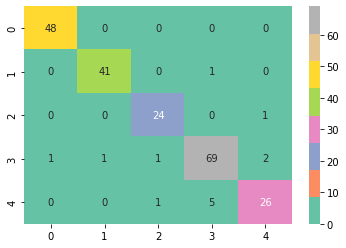

In [ ]:
def test(model, criterion):
  # monitor test loss and accuracy
  import numpy as np
  model.eval()

  ori_idx=[]
  nb_classes=5
  confusion_matrix1 = torch.zeros(nb_classes, nb_classes)
  y_ori=[]
  y_pre=[]
  test_loss = 0.
  correct = 0.
  total = 0.
  model.eval()
  for batch_idx, (data, target) in enumerate(test_loader):
    # move to GPU
    if torch.cuda.is_available():
      data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # print(output)
    # p = torch.nn.functional.softmax(output, dim=1)
    p = torch.nn.functional.softmax(output, dim=1)
    # print(p)
    ori_idx.append(target)
    
    # calculate the loss
    loss = criterion(output, target)
    # update average test loss 
    test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
    # convert output probabilities to predicted class
    _, preds = torch.max(output, 1)
    pred = output.data.max(1, keepdim=True)[1]
    np_target=target.cpu().numpy()
    np_preds=preds.cpu().numpy()
    print(np_target)
    print(np_preds)
    y_ori.extend(list(np_target))
    y_pre.extend(list(np_preds))
    for t, p in zip(target.view(-1), preds.view(-1)):
      confusion_matrix1[t.long(), p.long()] += 1
    # compare predictions to true label
    correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
    total += data.size(0)
            
  print('Test Loss: {:.6f}\n'.format(test_loss))
  print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))
  
  print(confusion_matrix1)
  from sklearn.metrics import classification_report,confusion_matrix
  print(classification_report(y_ori, y_pre, target_names=train_data.class_to_idx))
  import seaborn as sns
  sns.heatmap(confusion_matrix1,
            annot=True,
            cmap="Set2")
  # print(ori_idx)
  print("actual label",y_ori)
  print("predicted label",y_pre)
test(model, criterion)

In [ ]:
print("Train_loss=",train_loss_list)
print("valid_loss=",valid_loss_list)
print("Train_accuracy=",train_accuracy_list)
print("valid_accuracy=",valid_accuracy_list)


Train_loss= [1.4720533652739092, 1.201001457192681, 1.0137922289696606, 0.8632253367792476, 0.77098244225437, 0.6865420178933577, 0.6292502290823243, 0.5817894332788207, 0.5606180256740614, 0.5210456116632982, 0.5330244461921129, 0.5069763264195486, 0.4892185459082777, 0.4859359179708091, 0.44665334204381163, 0.4106007218360901, 0.38552097739143804, 0.4141560379754413, 0.44688932021910494, 0.3749174956570972, 0.4110323945907029, 0.37217986380512064, 0.35795746879144147, 0.3795559663664211, 0.34150683388791303, 0.3497225989333608, 0.3231010692702098, 0.344028229740533, 0.31094396469945257, 0.33174698715182865, 0.3112253407863053, 0.3015671413053166, 0.3185844189402732, 0.29851569252258, 0.28960855677723885, 0.30239400758662005, 0.2989572042768652, 0.28304182746532286, 0.297441804273562, 0.2698342175307599, 0.329226996072314, 0.2618118462745439, 0.2533590200949799, 0.293833926320076, 0.24474303500557487, 0.2707521185617555, 0.2808034369214015, 0.2679309296337041, 0.2898673453706909, 0.27